In [1]:
from evaluation_functions import eval_ensembliste, eval_tfidf
import matplotlib.pyplot as plt

In [2]:
dataset = 'med'
results = dict()

In [3]:
## Data fully preprocessed
results["full_preprocessed"] = eval_ensembliste(dataset, stop_words=True, stemm=True, bag_words=True)

In [4]:
## Data without removing stop words and with stemmer
results["stopwords"] = eval_ensembliste(dataset, stop_words=False, stemm=True, bag_words=True)

In [5]:
## Data without stop words and without stemmer
results["stemmer"]  = eval_ensembliste(dataset, stop_words=True, stemm=False, bag_words=True)

In [6]:
def plot_precision_recall(evaluation_list, labels):
    """
    Plots multiple recall-precision curves on same plot (for comparison)
    :param evaluation_list: list of tuples [(x1, y1), (x2, y2), ...]
    :param labels: curves title
    :return: None
    """
    for evaluation, label in zip(evaluation_list, labels):
        plt.plot([e[0] for e in evaluation], [e[1] for e in evaluation], label=label)
    plt.grid()
    plt.legend(loc='upper right')

res_list = [results["full_preprocessed"]["evaluation_linear"],
            results["full_preprocessed"]["evaluation_inverted"],
            results["stopwords"]["evaluation_linear"],
            results["stopwords"]["evaluation_inverted"],
            results["stemmer"]["evaluation_linear"],
            results["stemmer"]["evaluation_inverted"]]

labels = ["full_preprocessed linear",
          "full_preprocessed inverted",
          "stopwords linear",
          "stopwords inverted",
          "stemmer linear",
          "stemmer inverted"]

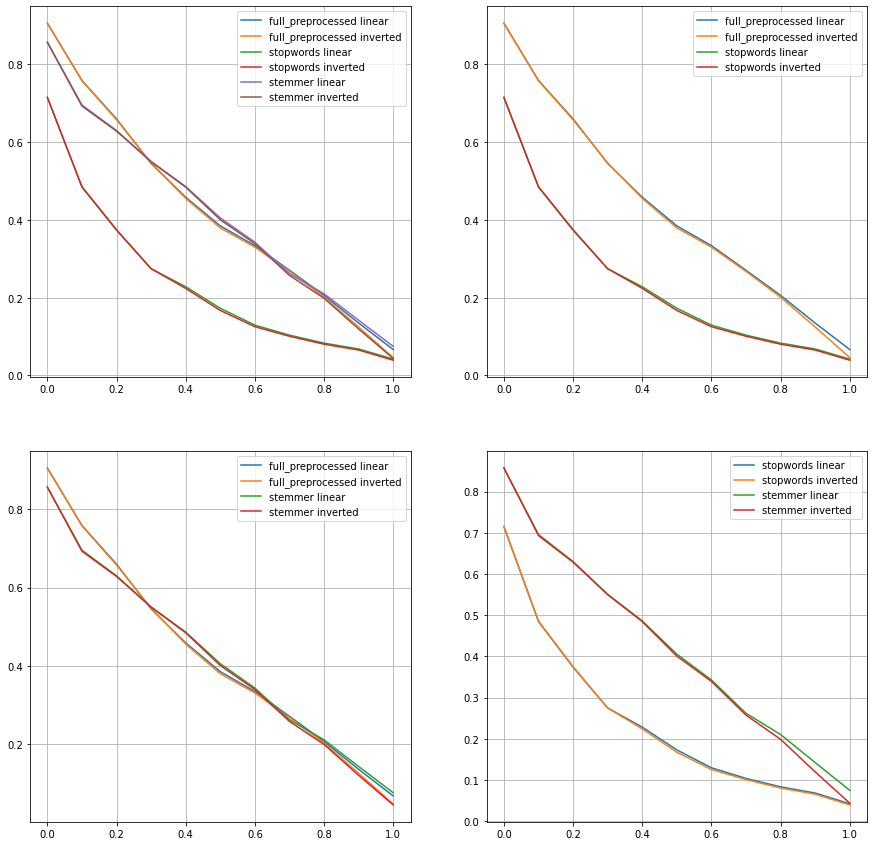

In [7]:
plt.figure(figsize=(15,15))

plt.subplot(221)
plot_precision_recall(res_list, labels)
plt.subplot(222)
plot_precision_recall(res_list[0:4], labels[0:4])
plt.subplot(223)
sublist_res = [res_list[0], res_list[1], res_list[4], res_list[5]]
sublist_labels = [labels[0], labels[1], labels[4], labels[5]]
plot_precision_recall(sublist_res, sublist_labels)
plt.subplot(224)
plot_precision_recall(res_list[2:], labels[2:])
plt.show()

In [8]:
def print_map(results):
    print("MAP linear:")
    print(f"full preprocessed : {results['full_preprocessed']['MAP_linear']}")
    print(f"stopwords : {results['stopwords']['MAP_linear']}")
    print(f"stemmer : {results['stemmer']['MAP_linear']}")

    print("MAP inverted:")
    print(f"full preprocessed : {results['full_preprocessed']['MAP_inverted']}")
    print(f"stopwords : {results['stopwords']['MAP_inverted']}")
    print(f"stemmer : {results['stemmer']['MAP_inverted']}")

In [9]:
print_map(results)

MAP linear:
full preprocessed : 0.41000295986479085
stopwords : 0.2215677643939839
stemmer : 0.4058343099589673
MAP inverted:
full preprocessed : 0.40701343347519525
stopwords : 0.2197344030011437
stemmer : 0.39987449568586


In [10]:
tf_idf=True
results_tfidf = dict()

In [11]:
## Data fully preprocessed
results_tfidf["full_preprocessed"] = eval_tfidf(dataset, tf_idf=tf_idf, stop_words=True, stemm=True, bag_words=True)

In [12]:
## Data without removing stop words and with stemmer
results_tfidf["stopwords"] = eval_tfidf(dataset, tf_idf=tf_idf,stop_words=False, stemm=True, bag_words=True)

In [13]:
## Data without stop words and without stemmer
results_tfidf["stemmer"]  = eval_tfidf(dataset, tf_idf=tf_idf, stop_words=True, stemm=False, bag_words=True)

In [14]:
res_list = [results_tfidf["full_preprocessed"]["evaluation_linear"],
            results_tfidf["full_preprocessed"]["evaluation_inverted"],
            results_tfidf["stopwords"]["evaluation_linear"],
            results_tfidf["stopwords"]["evaluation_inverted"],
            results_tfidf["stemmer"]["evaluation_linear"],
            results_tfidf["stemmer"]["evaluation_inverted"]]

labels = ["full_preprocessed linear",
          "full_preprocessed inverted",
          "stopwords linear",
          "stopwords inverted",
          "stemmer linear",
          "stemmer inverted"]

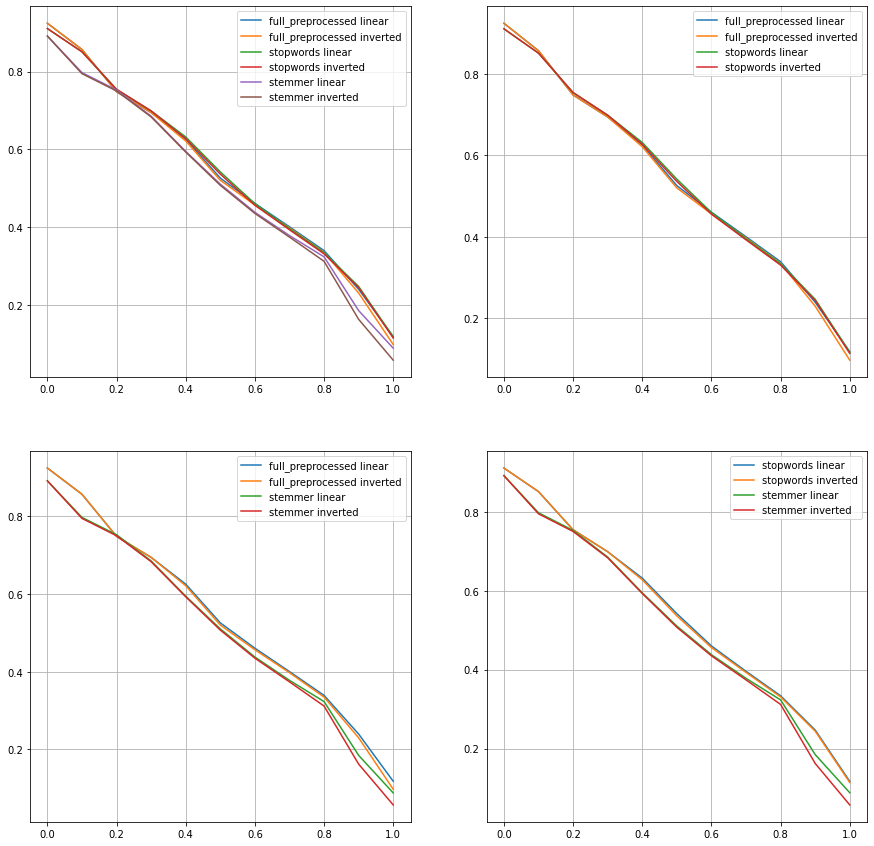

In [15]:
plt.figure(figsize=(15,15))

plt.subplot(221)
plot_precision_recall(res_list, labels)
plt.subplot(222)
plot_precision_recall(res_list[0:4], labels[0:4])
plt.subplot(223)
sublist_res = [res_list[0], res_list[1], res_list[4], res_list[5]]
sublist_labels = [labels[0], labels[1], labels[4], labels[5]]
plot_precision_recall(sublist_res, sublist_labels)
plt.subplot(224)
plot_precision_recall(res_list[2:], labels[2:])
plt.show()

In [16]:
print_map(results_tfidf)

MAP linear:
full preprocessed : 0.5172640938401141
stopwords : 0.5186738960134398
stemmer : 0.4914682863124702
MAP inverted:
full preprocessed : 0.5136242158015217
stopwords : 0.5167879251929902
stemmer : 0.4855254528442425
